In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [4]:
#img = cv2.imread('data/bird.jpg')
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Unit07/data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## 1-1. cluster with only RGB values

In [25]:
def km_clust(array, n_clusters):
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    #print(center)
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

[[185.44649668 187.72889918 166.69090074]
 [152.27923776 182.95829458 108.12866533]]
[[160.65006755 204.76241847 114.7023503 ]
 [183.69705852 182.39283814 164.4341738 ]
 [ 57.41803641  54.4571796   45.84786802]
 [143.51463427 127.84606351  96.69785159]]
[[169.60649032 163.46333391 141.55268116]
 [154.66060887 192.87593545 110.87158584]
 [114.08746649  98.41838137  66.91973861]
 [163.46516502 211.86492333 117.71360942]
 [148.4590588  132.74196373 102.80205712]
 [198.0715738  199.13298148 186.60356463]
 [ 37.85118553  40.19033121  40.90035981]
 [220.18478078 190.65815555  36.90038636]]
[[164.63118459 213.7885352  118.57527556]
 [148.71848732 134.40445889 104.92783355]
 [ 25.14019406  26.82428697  26.17553661]
 [159.06720662 205.47016425 112.04287362]
 [189.9566418  189.83291541 178.31344231]
 [131.75206532 117.42736046  85.30878092]
 [171.60007821 167.8984186  150.60587099]
 [ 45.2872915   56.46981732  69.69332804]
 [216.26663754 215.79372361 209.54681812]
 [177.89969129 201.39971244 140

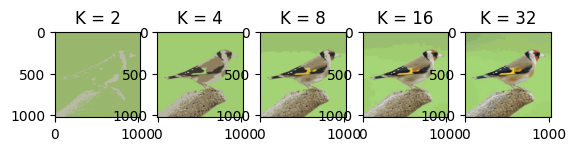

In [23]:
h, w, c = img.shape
#print(img.shape)
Z  = img.reshape((-1, 3))
Ka = [2,4,8,16,32]

for i,K in enumerate(Ka):
  label, center = km_clust(Z, K)

  center = np.uint8(center[:,:3])
  res = center[label.flatten()]
  res = res.reshape((img.shape))

  plt.subplot(1, len(Ka), i+1)
  plt.title("K = {}".format(K))
  plt.imshow(res)

plt.show()

In [17]:
label

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

## 1-2. cluster with RGB values and the location

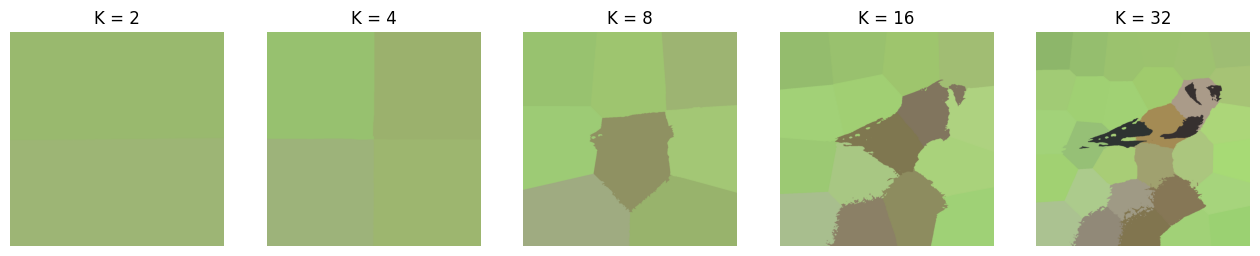

In [26]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)

plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

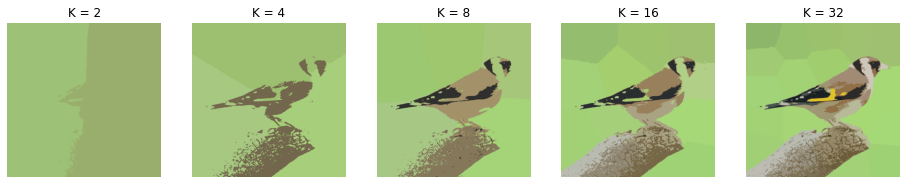

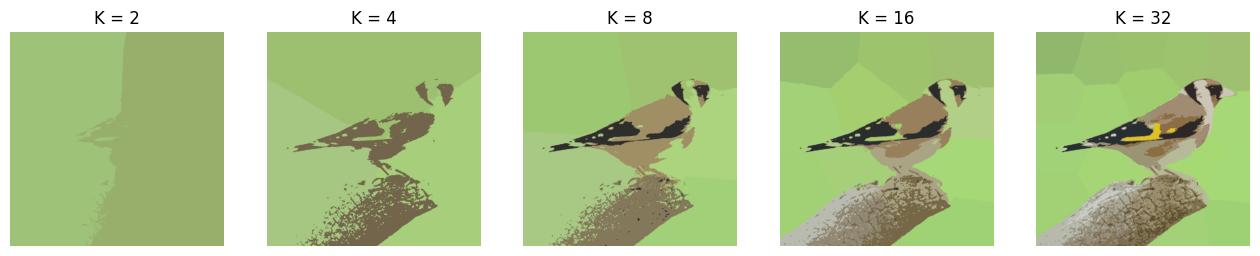

In [29]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)

plt.show()

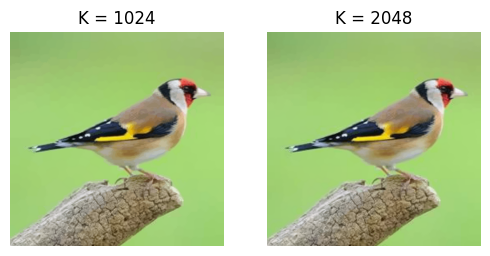

In [30]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]])
Z = Z.reshape(-1, 5)

Ks = [1024,2048]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)

plt.show()